In [2]:
pip install pandas-datareader

  Using cached pandas_datareader-0.10.0-py3-none-any.whl (109 kB)
Note: you may need to restart the kernel to use updated packages.


In [3]:
# Import our dependencies
import csv
import numpy as np
import pandas as pd
import pandas_datareader.data as web
import datetime as dt

import requests
from bs4 import BeautifulSoup as bs
import matplotlib.pyplot as plt
%matplotlib inline

## ETL Webscraping (Wikipedia - S&P 500 Companies)

In [4]:
url = 'https://en.wikipedia.org/wiki/List_of_S%26P_500_companies'
req = requests.get(url)
print(req)
# <Response[200]>

<Response [200]>


In [5]:
soup = bs(req.text, 'html.parser')
type(soup)

bs4.BeautifulSoup

In [6]:
table = soup.find("table", class_= "wikitable sortable")
df=pd.read_html(str(table))
# convert list to dataframe
df=pd.DataFrame(df[0])
print(df.head())

  Symbol     Security SEC filings  GICS Sector         GICS Sub-Industry  \
0    MMM           3M     reports  Industrials  Industrial Conglomerates   
1    AOS  A. O. Smith     reports  Industrials         Building Products   
2    ABT       Abbott     reports  Health Care     Health Care Equipment   
3   ABBV       AbbVie     reports  Health Care           Pharmaceuticals   
4   ABMD      Abiomed     reports  Health Care     Health Care Equipment   

     Headquarters Location Date first added      CIK      Founded  
0    Saint Paul, Minnesota       1976-08-09    66740         1902  
1     Milwaukee, Wisconsin       2017-07-26    91142         1916  
2  North Chicago, Illinois       1964-03-31     1800         1888  
3  North Chicago, Illinois       2012-12-31  1551152  2013 (1888)  
4   Danvers, Massachusetts       2018-05-31   815094         1981  


In [7]:
companies = df.drop(["SEC filings"], axis=1)
companies = companies.rename(columns={"GICS Sector": "GICS_Sector", "GICS Sub-Industry": "GICS_Sub_Industry","Headquarters Location": "Headquarters", "Date first added": "Date_First_Added"})
print(companies.head())

  Symbol     Security  GICS_Sector         GICS_Sub_Industry  \
0    MMM           3M  Industrials  Industrial Conglomerates   
1    AOS  A. O. Smith  Industrials         Building Products   
2    ABT       Abbott  Health Care     Health Care Equipment   
3   ABBV       AbbVie  Health Care           Pharmaceuticals   
4   ABMD      Abiomed  Health Care     Health Care Equipment   

              Headquarters Date_First_Added      CIK      Founded  
0    Saint Paul, Minnesota       1976-08-09    66740         1902  
1     Milwaukee, Wisconsin       2017-07-26    91142         1916  
2  North Chicago, Illinois       1964-03-31     1800         1888  
3  North Chicago, Illinois       2012-12-31  1551152  2013 (1888)  
4   Danvers, Massachusetts       2018-05-31   815094         1981  


In [8]:
companies.to_csv("IT_companies.csv", index = False)

In [9]:
# Note: Companies file can be used to get the list of ALL tickers for automating

## ETL Stocks Data (Yahoo Finance)

In [10]:
# This is a dataset that is considered as a standard (S&P 500), and it is useful for merging
df_SPY = web.DataReader('SPY', 'yahoo', start='2020-01-01', end = dt.datetime.today())

In [11]:
df_Close = df_SPY["Close"]
df_Close.name = "SPY"

In [12]:
df_Close


Date
2020-01-02    324.869995
2020-01-03    322.410004
2020-01-06    323.640015
2020-01-07    322.730011
2020-01-08    324.450012
                 ...    
2022-07-11    384.230011
2022-07-12    380.829987
2022-07-13    378.829987
2022-07-14    377.910004
2022-07-15    384.112305
Name: SPY, Length: 639, dtype: float64

## 10 Companies in Information Technology

In [13]:
symbols = ["NVDA", "MSFT", "AMD", "AAPL", "MU", "NXPI", "PAYC", "PYPL", "SWKS", "AMAT"]

for symbol in symbols:
    stock = web.DataReader(symbol, 'yahoo', start='2020-01-01', end = dt.datetime.today())
    stock.to_csv(f"{symbol}.csv")
    
print("Complete")


Complete


In [14]:
# This is a dataset that is considered as a standard (S&P 500), and it is useful for merging
df_SPY = web.DataReader('SPY', 'yahoo', start='2020-01-01', end = dt.datetime.today())

In [15]:
df = df_SPY[["Close"]]
df = df.rename(columns = {"Close": "SPY"})
df

,SPY
Date,
2020-01-02,324.869995
2020-01-03,322.410004
2020-01-06,323.640015
2020-01-07,322.730011
2020-01-08,324.450012
...,...
2022-07-11,384.230011
2022-07-12,380.829987
2022-07-13,378.829987


In [20]:
## Note: If you need another column, Change "Close" to respective column, e.g., "Volume"
## Note: SPY is a standard dataset for getting ALL traded dates correctly, and any NULL values are dropped here, and SPY column is also dropped

symbols = ["NVDA", "MSFT", "AMD", "AAPL", "MU", "NXPI", "PAYC", "PYPL", "SWKS", "AMAT"]
def get_data(symbols):    
    df = df_SPY[["Close"]]
    df = df.rename(columns = {"Close": "SPY"})
    for symbol in symbols:
        df_temp = pd.read_csv("{}.csv".format(symbol), index_col="Date", parse_dates = True, 
                         usecols = ["Date", "Close"], na_values = "nan")
        df_temp = df_temp.rename(columns = {"Close": symbol})
        df = df.join(df_temp)
    return df
df_IT = get_data(symbols)
df_IT = df_IT.drop(columns="SPY")

In [21]:
df_IT

,NVDA,MSFT,AMD,AAPL,MU,NXPI,PAYC,PYPL,SWKS,AMAT
Date,,,,,,,,,,
2020-01-02,59.977501,160.619995,49.099998,75.087502,55.389999,128.539993,271.799988,110.750000,121.669998,62.200001
2020-01-03,59.017502,158.619995,48.599998,74.357498,54.529999,127.300003,272.709991,108.760002,118.650002,61.209999
2020-01-06,59.264999,159.029999,48.389999,74.949997,53.570000,126.400002,278.089996,110.169998,116.559998,59.889999
2020-01-07,59.982498,157.580002,48.250000,74.597504,58.270000,128.039993,279.489990,109.669998,117.669998,61.619999
2020-01-08,60.095001,160.089996,47.830002,75.797501,57.520000,128.360001,283.119995,111.820000,119.540001,61.580002
...,...,...,...,...,...,...,...,...,...,...
2022-07-11,151.520004,264.510010,76.949997,144.869995,57.810001,151.960007,319.940002,70.470001,95.419998,88.620003
2022-07-12,150.820007,253.669998,76.360001,145.860001,59.180000,152.240005,296.799988,71.430000,96.510002,88.730003
2022-07-13,151.639999,252.720001,77.519997,145.490005,58.860001,155.009995,295.380005,71.360001,97.879997,89.080002


In [18]:
# # Get stock values for your Ticker (Symbol), Change it appropriately
df_AAPL = web.DataReader('AAPL', 'yahoo', start='2020-01-01', end = dt.datetime.today())
df_AAPL

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2020-01-02,75.150002,73.797501,74.059998,75.087502,135480400.0,73.785904
2020-01-03,75.144997,74.125000,74.287498,74.357498,146322800.0,73.068550
2020-01-06,74.989998,73.187500,73.447502,74.949997,118387200.0,73.650795
2020-01-07,75.224998,74.370003,74.959999,74.597504,108872000.0,73.304413
2020-01-08,76.110001,74.290001,74.290001,75.797501,132079200.0,74.483612
...,...,...,...,...,...,...
2022-07-11,146.639999,143.779999,145.669998,144.869995,63141600.0,144.869995
2022-07-12,148.449997,145.050003,145.759995,145.860001,77588800.0,145.860001
2022-07-13,146.449997,142.119995,142.990005,145.490005,71185600.0,145.490005


<AxesSubplot:title={'center':'Closing Price'}, xlabel='Date'>

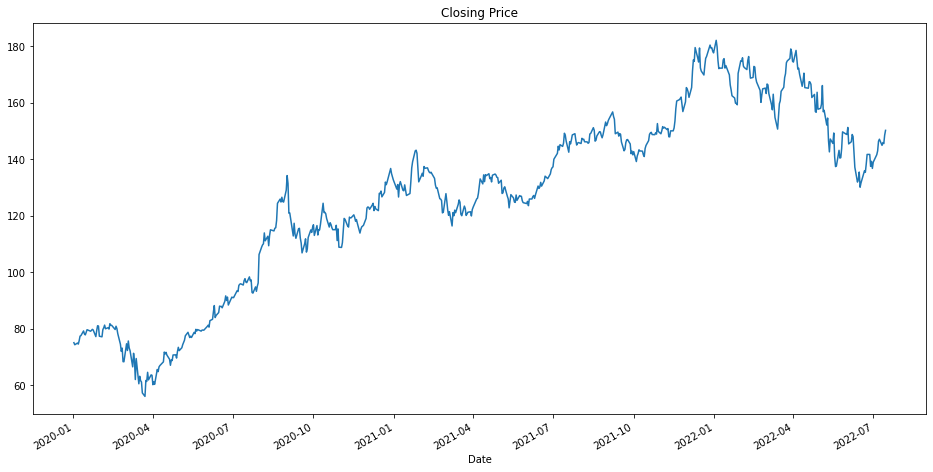

In [22]:

df_IT["AAPL"].plot(figsize = (16, 8), title = "Closing Price")

<AxesSubplot:xlabel='Date'>

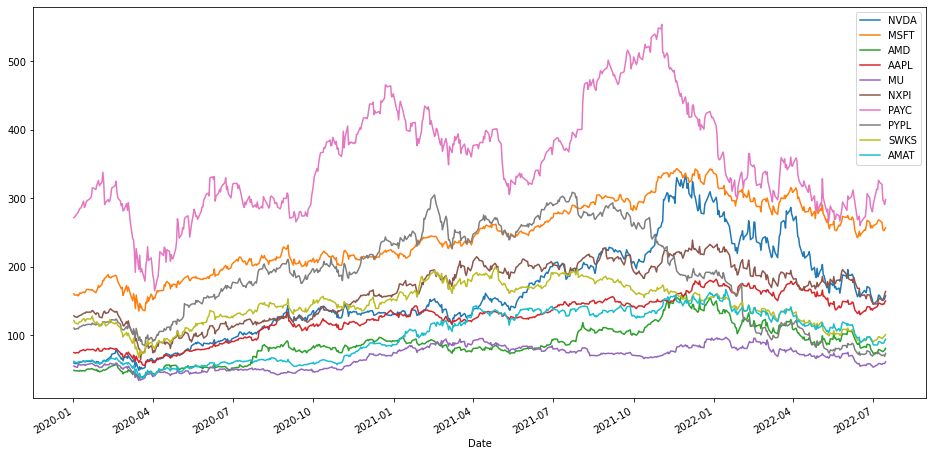

In [23]:
df_IT.plot(figsize = (16, 8))
